# Quantum-Inspired Feature Mapping

This notebook applies quantum-inspired feature expansion using Random Fourier Features.

## Overview
1. Load baseline graph
2. Initialize quantum feature mapper
3. Transform node features
4. Visualize feature distributions
5. Create and save quantum graph

**Estimated time:** 1-2 minutes

In [ ]:
# Clear any cached src imports
import sys
if 'src' in sys.modules:
    del sys.modules['src']
for key in list(sys.modules.keys()):
    if key.startswith('src.'):
        del sys.modules[key]
print("✓ Cleared cached imports")

In [ ]:
import sys
import torch
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Add project root to sys.path
notebook_dir = os.path.abspath('')
project_root = os.path.dirname(notebook_dir)
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.quantum_features import QuantumFeatureMap
from src.config import QUANTUM_CONFIG, TRAINING_CONFIG, ARTIFACTS_DIR, FIGURES_DIR, ARTIFACT_FILES, FIGURE_FILES
from src.utils import get_device

device = get_device()

Device: cpu


## 1. Import Libraries & Setup

In [ ]:
graph_path = ARTIFACTS_DIR / ARTIFACT_FILES['baseline_graph']
data = torch.load(graph_path, weights_only=False).to(device)
print(f"Original features: {data.x.shape}")

# Apply quantum transformation
feature_mapper = QuantumFeatureMap(
    input_dim=data.num_node_features,
    expansion_factor=QUANTUM_CONFIG['expansion_factor'],
    use_fourier=QUANTUM_CONFIG['fourier_features'],
    random_seed=TRAINING_CONFIG['random_seed']
)

print(f"Mapping: {data.num_node_features} -> {feature_mapper.output_dim}")

x_quantum = feature_mapper.transform(data.x)
print(f"Quantum features: {x_quantum.shape}")

Original features: torch.Size([203769, 182])
Mapping: 182 -> 364
Quantum features: torch.Size([203769, 364])


## 2. Load Graph & Apply Quantum Transformation

Load the baseline graph and apply quantum feature mapping to expand the feature space.


Original Features:
  Mean: nan
  Std:  nan
  Min:  nan
  Max:  nan

Quantum Features:
  Mean: nan
  Std:  nan
  Min:  nan
  Max:  nan


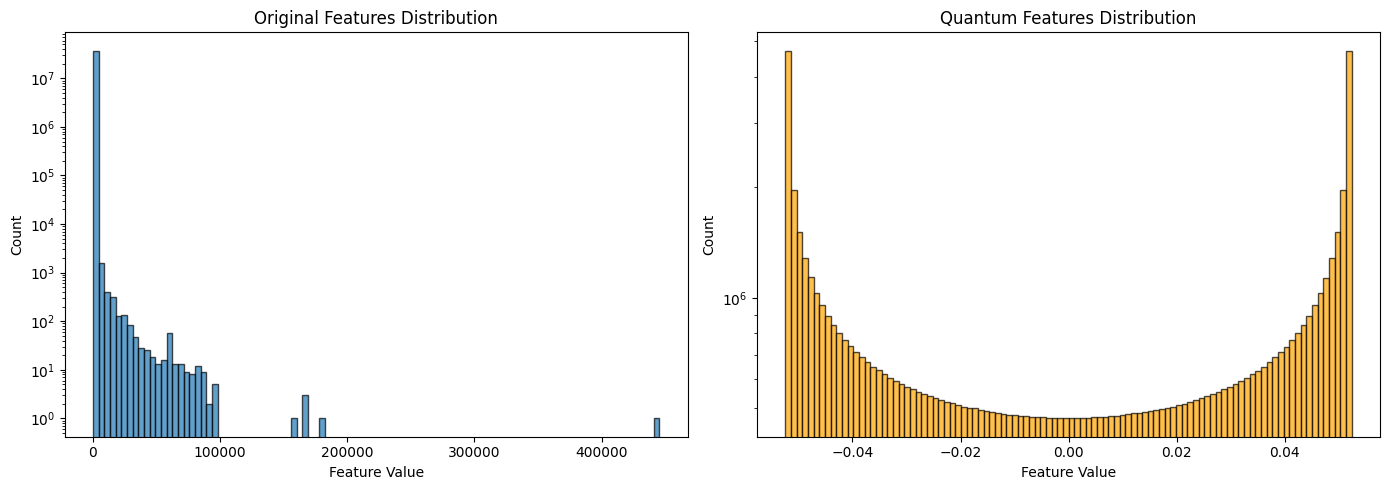

In [ ]:
print("\nOriginal Features:")
print(f"  Mean: {data.x.mean().item():.4f}")
print(f"  Std:  {data.x.std().item():.4f}")
print(f"  Min:  {data.x.min().item():.4f}")
print(f"  Max:  {data.x.max().item():.4f}")

print("\nQuantum Features:")
print(f"  Mean: {x_quantum.mean().item():.4f}")
print(f"  Std:  {x_quantum.std().item():.4f}")
print(f"  Min:  {x_quantum.min().item():.4f}")
print(f"  Max:  {x_quantum.max().item():.4f}")

# Visualize feature distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original features
axes[0].hist(data.x.cpu().numpy().flatten(), bins=100, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Feature Value')
axes[0].set_ylabel('Count')
axes[0].set_title('Original Features Distribution')
axes[0].set_yscale('log')

# Quantum features
axes[1].hist(x_quantum.cpu().numpy().flatten(), bins=100, alpha=0.7, 
             color='orange', edgecolor='black')
axes[1].set_xlabel('Feature Value')
axes[1].set_ylabel('Count')
axes[1].set_title('Quantum Features Distribution')
axes[1].set_yscale('log')

plt.tight_layout()
save_path = FIGURES_DIR / FIGURE_FILES['quantum_features']
plt.savefig(save_path, dpi=150)
plt.show()

## 3. Compare Feature Statistics

Compare the statistical properties of original vs quantum-transformed features.

In [ ]:
from torch_geometric.data import Data

# Create quantum graph with all attributes
data_quantum = Data(
    x=x_quantum,
    edge_index=data.edge_index,
    y=data.y,
    timestep=data.timestep,
    labeled_mask=data.labeled_mask,
    unlabeled_mask=data.unlabeled_mask
)

# Copy masks if they exist from previous training
if hasattr(data, 'train_mask'):
    data_quantum.train_mask = data.train_mask
    data_quantum.val_mask = data.val_mask
    data_quantum.test_mask = data.test_mask
    print("Copied train/val/test masks from baseline graph")

print(f"\nQuantum graph: {data_quantum}")


Quantum graph: Data(x=[203769, 364], edge_index=[2, 672479], y=[203769], timestep=[203769], labeled_mask=[203769], unlabeled_mask=[203769])


## 4. Create Quantum Graph Data Object

Bundle quantum features with the same graph structure and masks.

In [ ]:
save_path = ARTIFACTS_DIR / ARTIFACT_FILES['quantum_graph']
torch.save(data_quantum, save_path)
print(f"\nQuantum graph saved to {save_path}")
print("Proceed to 06_train_gat_quantum.ipynb")


Quantum graph saved to c:\Users\tusha\Documents\UT_Dallas\ACM_SP26\imple2\artifacts\elliptic_graph_quantum.pt
Proceed to 06_train_gat_quantum.ipynb


---

## ✅ Quantum Feature Mapping Complete!

Features expanded from {original} to {quantum} dimensions. Proceed to **06_train_gat_quantum.ipynb** to train with quantum features.

## 5. Save Quantum Graph